In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from Wind.Results import DBResults, DBMeasures
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal, mongolocalmeasures
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.genmod.generalized_linear_model import GLM
import pandas as pd
import numpy as np


In [6]:
query={'experiment':'MLP_s2s_best', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)


In [7]:
results.sample(0.5)
a=results.extract_result()

In [8]:
measure = DBMeasures(conn=mongolocalmeasures)

measure.retrieve_measures()


In [9]:
meas = 'SpecEnt'
var='wind_direction_sin'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_sin', measure=meas)
b3=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_cos', measure=meas)
b4=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='Stab3m')
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas}_wind_direction_sin':b2[:,1], 
                     f'{meas}_wind_direction_cos':b3[:,1],f'Stab3m_wind_speed':b4[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas}_wind_direction_sin + {meas}_wind_direction_cos + Stab3m_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                63309
Model:                            GLM   Df Residuals:                    63304
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.14641
Method:                          IRLS   Log-Likelihood:                -29010.
Date:                Tue, 27 Oct 2020   Deviance:                       9268.4
Time:                        07:13:58   Pearson chi2:                 9.27e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [10]:
meas = 'SpecEnt'
meas2 = 'Stab3m'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas2)
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas2}_wind_speed':b2[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas2}_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                63329
Model:                            GLM   Df Residuals:                    63326
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.15695
Method:                          IRLS   Log-Likelihood:                -31220.
Date:                Tue, 27 Oct 2020   Deviance:                       9938.7
Time:                        07:14:20   Pearson chi2:                 9.94e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.7420      0

In [11]:
meas = 'SpecEnt'
var='wind_speed'
b=measure.extract_measure_sites(sites= a[:,0], var=var, measure=meas)
data = pd.DataFrame({'test':a[:,1], meas:b[:,1]})

In [12]:
model = GLM.from_formula(f'test ~ {meas}', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                63329
Model:                            GLM   Df Residuals:                    63327
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.17768
Method:                          IRLS   Log-Likelihood:                -35150.
Date:                Tue, 27 Oct 2020   Deviance:                       11252.
Time:                        07:14:24   Pearson chi2:                 1.13e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6682      0.043    526.900      0.0

/home/bejar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



/home/bejar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='test', ylabel='SpecEnt'>

<Figure size 432x288 with 0 Axes>

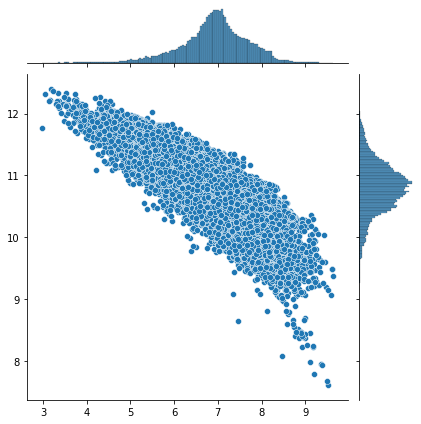

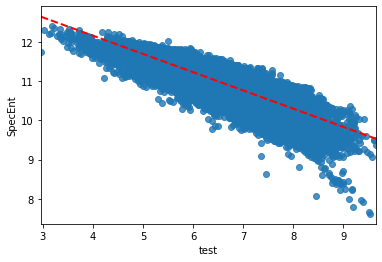

In [13]:
fig = plt.figure()
sns.jointplot(a[:,1], b[:,1])
fig = plt.figure()
sns.regplot('test',meas, data=data, truncate=True, line_kws={'color':'red', 'linewidth':2,'linestyle':'--'})

In [14]:
measure.variables

['wind_speed',
 'temperature',
 'density',
 'pressure',
 'wind_direction_cos',
 'wind_direction_sin']

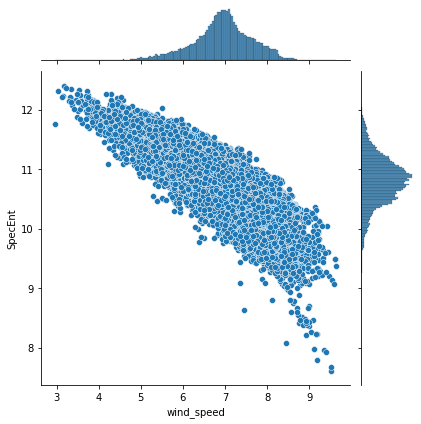

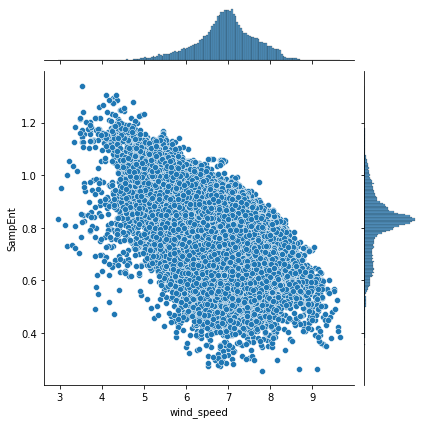

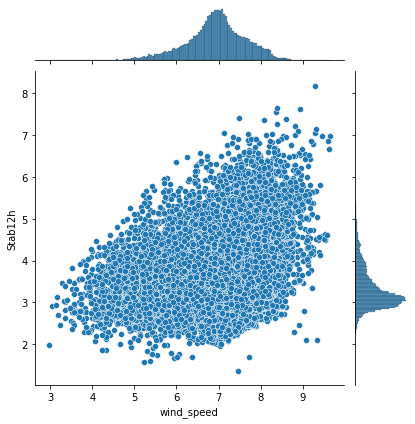

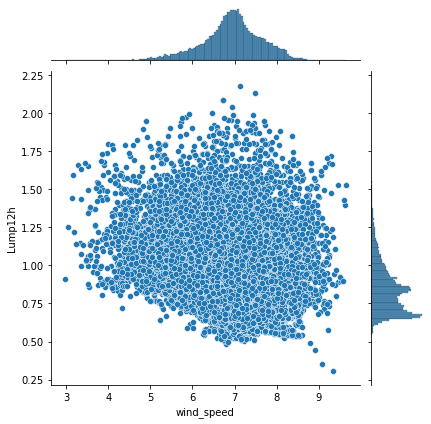

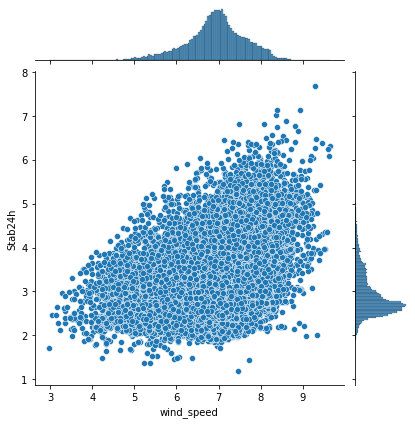

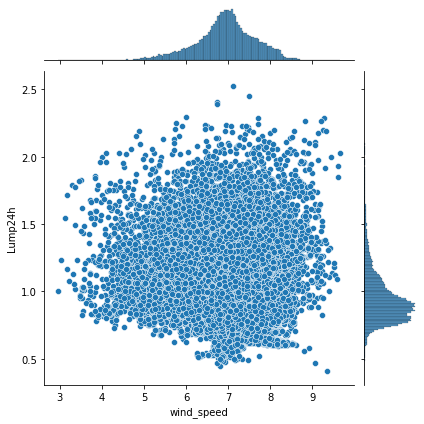

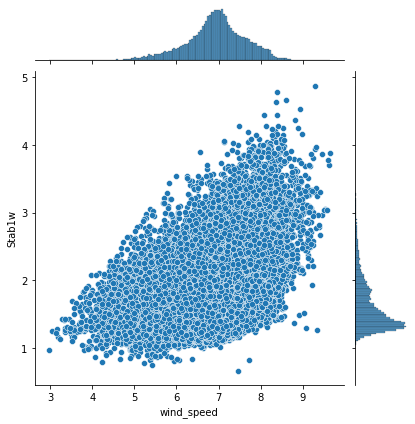

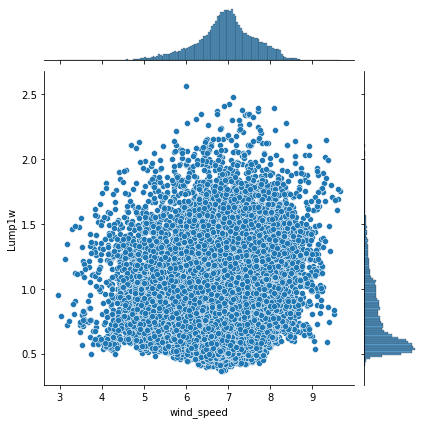

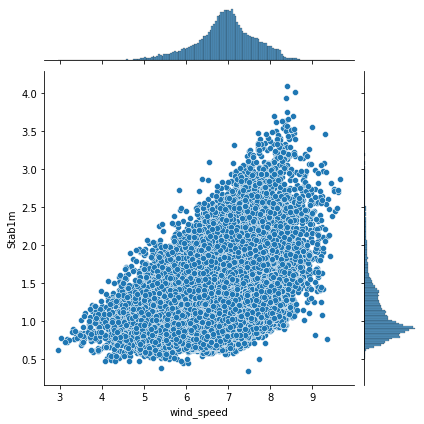

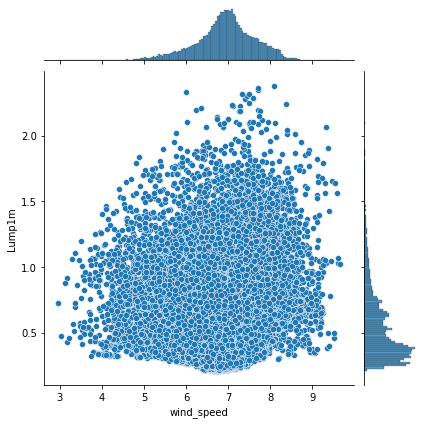

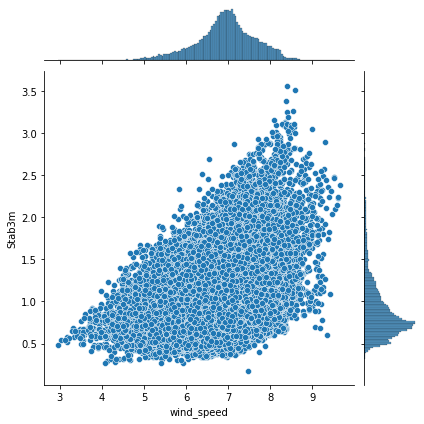

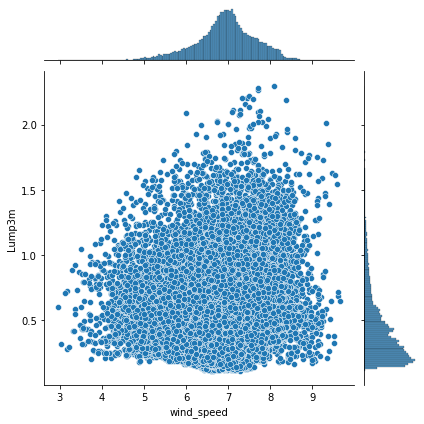

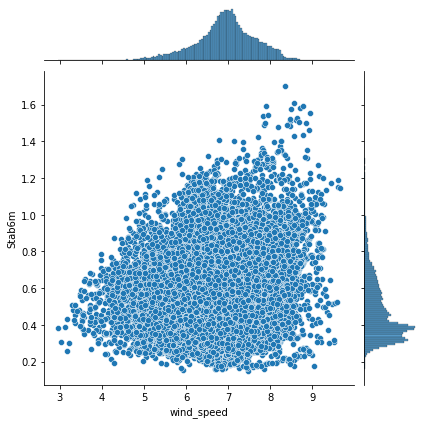

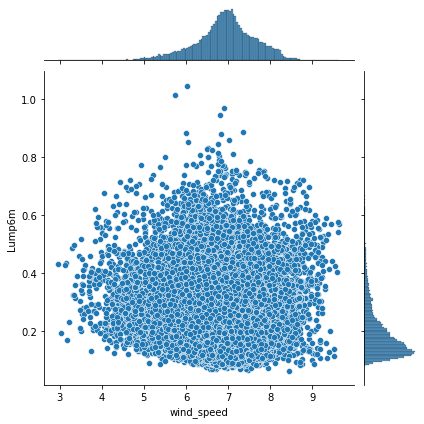

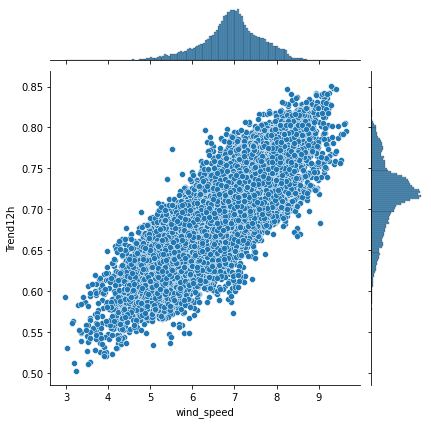

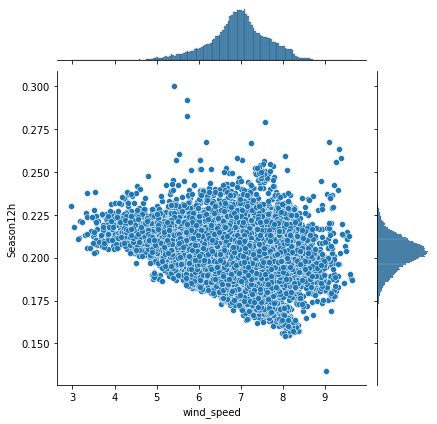

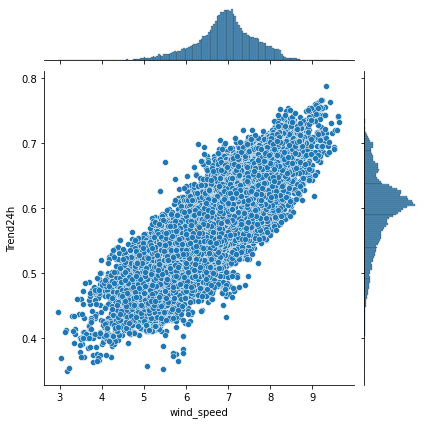

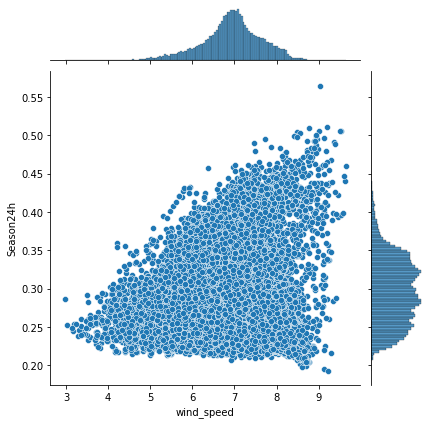

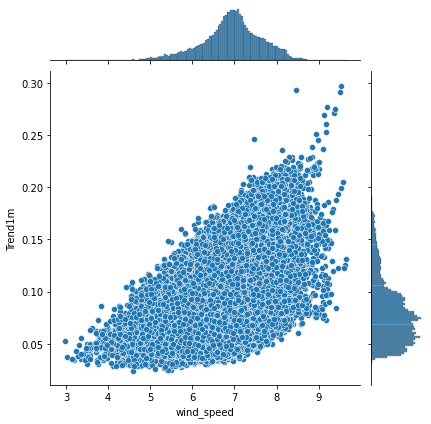

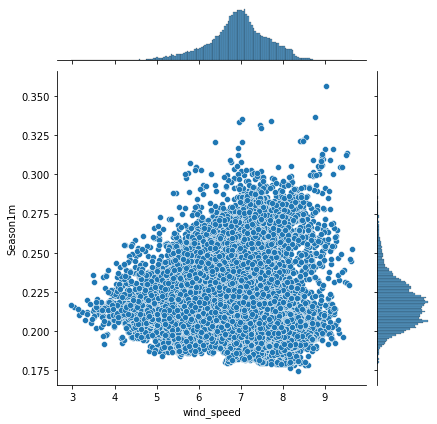

In [15]:
for m in measure.measures:
    b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
    data = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
    sns.jointplot(x='wind_speed', y=m, data=data)

In [16]:
measure = DBMeasures(conn=mongolocal)

measure.retrieve_measures(measure='stl')

AttributeError: 'NoneType' object has no attribute 'keys'

In [9]:
measure.measures

['Trend12h', 'Season12h', 'Trend24h', 'Season24h', 'Trend1m', 'Season1m']

In [18]:
measure.variables

['wind_speed', 'temperature', 'density', 'pressure']

In [52]:
meas = 'Trend12h'
var='density'
b1=measure.extract_measure_sites(sites= a[:,0], var=var, measure=meas)

In [53]:
data = pd.DataFrame({'test':a[:,1], f'{meas}_{var}':b1[:,1]})


<Figure size 432x288 with 0 Axes>

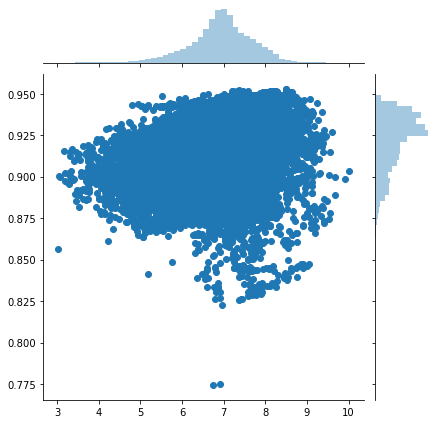

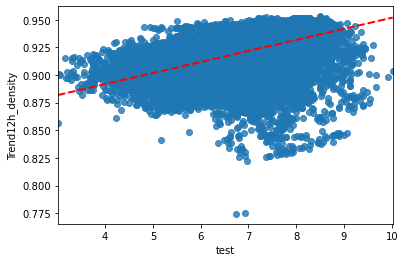

In [54]:
fig = plt.figure()
sns.jointplot(a[:,1], b1[:,1])
fig = plt.figure()
sns.regplot('test',f'{meas}_{var}', data=data, truncate=True, line_kws={'color':'red', 'linewidth':2,'linestyle':'--'})